In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

Read the csv file

In [2]:
df=pd.read_csv('DS_salary_cleaned.csv')

Check the different values for job title

In [3]:
df['Job Title'].value_counts()

Data Scientist                                         835
Data Engineer                                          117
Senior Data Scientist                                  115
Senior Data Engineer                                    31
Principal Data Scientist                                17
                                                      ... 
MED TECH/LAB SCIENTIST - LAB                             1
Bakery Food Scientist                                    1
(Junior) Data Scientist - Supply Chain & Operations      1
Cloud Data Engineer                                      1
Data Architect (New Position)                            1
Name: Job Title, Length: 200, dtype: int64

Check the columns of our dataset

In [4]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'City', 'State', 'Country', 'At_hq',
       'Company_age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'Hadoop',
       'Tableau', 'Power_bi', 'BI', 'Min_revenue', 'Max_revenue',
       'Average_revenue'],
      dtype='object')

Return the job position title

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [6]:
df['Job Simplified']=df['Job Title'].apply(title_simplifier)

Specify if it's an entry level position or not

In [7]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [8]:
df['Job Senioriry']=df['Job Description'].apply(seniority)

Job description length

In [9]:
df['Desc Length']=df['Job Description'].apply(lambda x : len(x))

Number of Competitors

In [10]:
df['Competitors Length']=df['Competitors'].apply(lambda x:len(x.split(',')) if x !='-1' else 0) 

Take out the \n at the end of companies names

In [11]:
df['Company Name']=df['Company Name'].apply(lambda x:x.replace('\n',''))

# EDA

Check data types/null values/number of rows and columns using .info() 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company Name        2000 non-null   object 
 1   Competitors         2000 non-null   object 
 2   Founded             2000 non-null   int64  
 3   Headquarters        2000 non-null   object 
 4   Industry            2000 non-null   object 
 5   Job Description     2000 non-null   object 
 6   Job Title           2000 non-null   object 
 7   Location            2000 non-null   object 
 8   Rating              2000 non-null   float64
 9   Revenue             2000 non-null   object 
 10  Salary Estimate     2000 non-null   object 
 11  Sector              2000 non-null   object 
 12  Size                2000 non-null   object 
 13  Type of ownership   2000 non-null   object 
 14  min_salary          2000 non-null   int64  
 15  max_salary          2000 non-null   int64  
 16  avg_sa

Change the features ['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI'] to categorical as they are categorical data and not numericl data

In [13]:
df[['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI']]=df[['At_hq','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI']].astype('object') 

put numerical features in one dataframe and categorical features in an other dataframe

In [14]:
numerical_cols=df.select_dtypes(exclude='object')

categorical_cols=df.select_dtypes(include='object')

Use the .describe() to check mean,std,min,(25,50,75)quartiles,max of our numerical variables

In [15]:
numerical_cols.describe()

,Founded,Rating,min_salary,max_salary,avg_salary,Company_age,Min_revenue,Max_revenue,Average_revenue,Desc Length,Competitors Length
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1679.432000,3.537400,81.33700,111.820000,96.578500,30.344500,1340.362000,1698.909500,1519.635750,3615.448500,0.720000
std,716.684585,1.259919,25.19162,26.778913,25.116832,38.533093,3085.853188,3368.311236,3194.491176,1683.068872,1.224479
min,-1.000000,-1.000000,31.00000,59.000000,47.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
25%,1939.000000,3.300000,61.00000,98.000000,79.500000,6.000000,0.000000,0.000000,0.000000,2508.000000,0.000000
50%,1996.000000,3.700000,83.00000,101.000000,92.000000,15.000000,25.000000,25.000000,22.500000,3430.500000,0.000000
75%,2008.000000,4.200000,99.00000,129.000000,116.500000,39.000000,500.000000,1000.000000,750.000000,4555.000000,2.000000
max,2020.000000,5.000000,145.00000,182.000000,163.500000,276.000000,10000.000000,10000.000000,10000.000000,10678.000000,4.000000


Use .describe() to get the number of unique values,the top value and the frequency of the top value of our categorical data

In [16]:
categorical_cols.describe()

,Company Name,Competitors,Headquarters,Industry,Job Description,Job Title,Location,Revenue,Salary Estimate,Sector,...,R,Spark,AWS,Excel,Hadoop,Tableau,Power_bi,BI,Job Simplified,Job Senioriry
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,541,150,269,58,616,200,241,14,37,25,...,2,2,2,2,2,2,2,2,7,3
top,Q2 Solutions,-1,"New York, NY",Biotech & Pharmaceuticals,We are seeking a Data Scientist Developer with...,Data Scientist,"New York, NY",Unknown / Non-Applicable,$83K-$101K (Glassdoor est.),Information Technology,...,0,0,0,0,0,0,0,0,data scientist,senior
freq,56,1458,115,291,14,835,122,646,275,558,...,1744,1454,1515,1915,1561,1659,1908,1911,1257,1424


### Numerical variables


Check numerical columns

In [17]:
numerical_cols.columns

Index(['Founded', 'Rating', 'min_salary', 'max_salary', 'avg_salary',
       'Company_age', 'Min_revenue', 'Max_revenue', 'Average_revenue',
       'Desc Length', 'Competitors Length'],
      dtype='object')

#### We check our numerical variables using histograms and boxplots

When we discard the -1 which means an emtpty value we can see that we hava some outliers in rating=1 but rather than that we can say that we have a slightly left skewed distribution for our 'Rating' feature

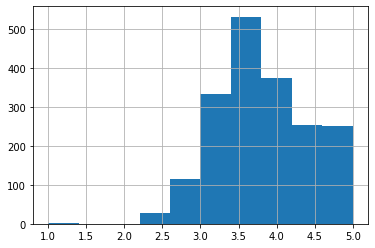

In [18]:
df[df['Rating']>=1]['Rating'].hist()
plt.show()

As we deduced in our histogram the values where rating =1 are outliers
so we better ignore them when building our model

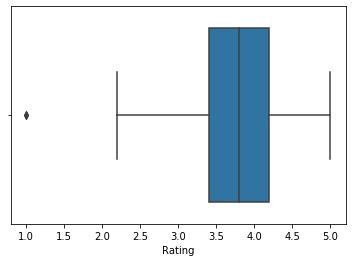

In [19]:
#sns.set(style="whitegrid")
sns.boxplot(x=df[df['Rating']>=1]['Rating'])

We can say that we have a normal distribution for our 'avg_salary' feature with the avg between 80K,90K and also we have lot of companies that pay more than the average.
Maybe the reson is that most of the  companies are searching for Senior data sientists

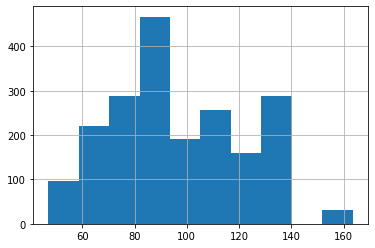

In [20]:
df['avg_salary'].hist()


Company age is right scued with most of the companies aging less than 20 years which means that youger companies are more interested in applying data science. 

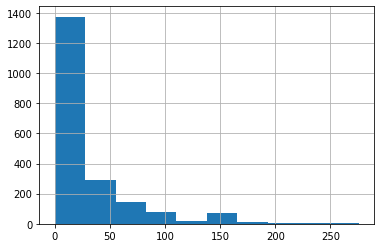

In [21]:
df['Company_age'].hist()

As we explained in our previous histograms most of the companies recruiting data scientists are less than 50 years old and companies that are more than 100 years old are outliers.
Also for the salary, we see that the average salary is between 80k,90k and that we have more companies that pay more than the average than less than the average.


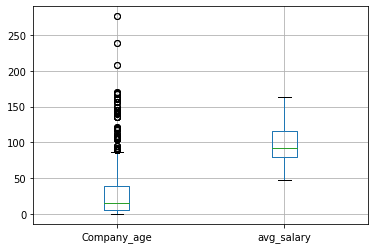

In [22]:
df.boxplot(column=['Company_age','avg_salary'])

Description length is normally distribted with most of the descriptions having a length between 2k,4k words which we can say is more than enough to describe a job position

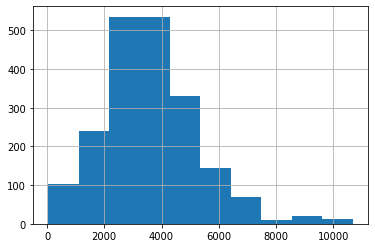

In [23]:
df['Desc Length'].hist()


#### Creating a heatmap to check the correlation between our dependant variables and our independant variable

Creating a correlation matrix

In [24]:
corr=df[['Company_age','avg_salary','Rating','Desc Length','Competitors Length']].corr()
corr

,Company_age,avg_salary,Rating,Desc Length,Competitors Length
Company_age,1.000000,-0.024055,0.083917,0.286041,0.107284
avg_salary,-0.024055,1.000000,0.002784,-0.078211,-0.084728
Rating,0.083917,0.002784,1.000000,0.073489,0.095412
Desc Length,0.286041,-0.078211,0.073489,1.000000,0.204610
Competitors Length,0.107284,-0.084728,0.095412,0.204610,1.000000


Creating a heatmap usin the correlation matrix

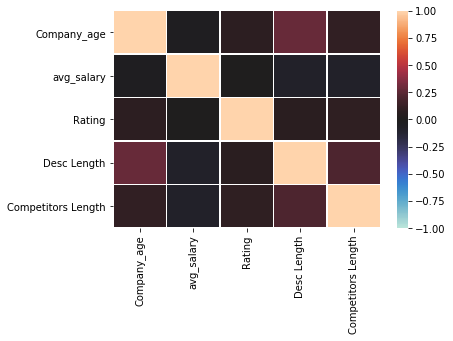

In [25]:
sns.heatmap(corr,vmax=1,vmin=-1,center=0,linewidths=.5)

##### Correlation between independant variables

From our correlation matrix and our heatmap we can see that description length is positively correlated with company age whith means that the older the company the longer the position description will be also it's positively correlated with the number of competitors meanig the companies that have more competitors tend to make longer descriptions for the position 

##### Correlation between independant variables and our dependant variable

There is no high correlation between these features and our dependant variable but we ca see that the correlation between the salary and
ratings is positive meaning the companies with higher ratings tend to pay more.
Also there is a negative correlation between Company_age,Desc_length,Competitors_length and our dependant variable meaning the older the company,the longer the description,the more competitors the less the salary will be.

### Categorical variables


We put our categorical columns in a list.

In [26]:
cat=list(categorical_cols.columns)


Check the number of diffrent values in each variable.

In [27]:
for i in range(len(cat)):
    print("The categorical feature name is: \n",cat[i])
    print("______________________________________\n")
    print("The number of different values: \n",categorical_cols[cat[i]].value_counts().count())
    

The categorical feature name is: 
 Company Name
______________________________________

The number of different values: 
 541
The categorical feature name is: 
 Competitors
______________________________________

The number of different values: 
 150
The categorical feature name is: 
 Headquarters
______________________________________

The number of different values: 
 269
The categorical feature name is: 
 Industry
______________________________________

The number of different values: 
 58
The categorical feature name is: 
 Job Description
______________________________________

The number of different values: 
 616
The categorical feature name is: 
 Job Title
______________________________________

The number of different values: 
 200
The categorical feature name is: 
 Location
______________________________________

The number of different values: 
 241
The categorical feature name is: 
 Revenue
______________________________________

The number of different values: 
 14
The cate

If a categirical feature have less than 15 values we append it to our list L_cat and create a data frame c with those features.

In [28]:
L_cat=[]
for i in categorical_cols:
    if categorical_cols[i].value_counts().count()<15:
        L_cat.append(i)
c=df[L_cat]

Create bar plots for the features in L_cat.

We can see in these bar plots what are the most common values in each feature

for example in 'Size'we can see that most of the companies recruiting data scientist are companies that have(1001 to 5000 employees) with more than 400 job offerings followed by (51 to 200 employees) so we can say that small and medium companies are more interested in recruting data scientists.

In 'Type of ownership' it's obvious that most of the companies recruting are from the private sector.

'Job Simplified' and 'Seniority' can tell us that most of the positions are for senior data scientists.

In [29]:
fig, ax = plt.subplots(6,3, figsize=(100,160))
for i,sub  in zip(L_cat,ax.flatten()):
    cat_num=c[i].value_counts()
    sns.barplot(x=cat_num.index,y=cat_num,ax=sub)
    sub.set_title(i,fontsize="70")
    #sub.legend(cat_num.index,fontsize='90')
    for l in sub.get_xticklabels():
        l.set_rotation(90)   
        l.set_fontsize(70)
    for l in sub.get_yticklabels():
        l.set_fontsize(70)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

If a categirical feature have more than 15 values we append it to our list H_cat and create a data frame hc with those features.

In [30]:
H_cat=[]
for i in categorical_cols:
    if categorical_cols[i].value_counts().count()>=15:
        H_cat.append(i)
H_cat.remove('Job Description')
hc=df[H_cat]

Create bar plots for features in H_cat that takes the top 20 values in each feature

In the 'Industry' barchart we see that most of companies recruiting are in 'Biotech and farmaceuticals' and maybe that is because the company recruiting the most >50 is in that industry. Then it is followed by the 'IT' services indusry and that is because most of the companies are in 'information technology' sector which we can see in the Sector barchart.

Also looking at the City and State barchart we can tell that California,Massachusetts and NEw York are the most places where you can find data science jobs.



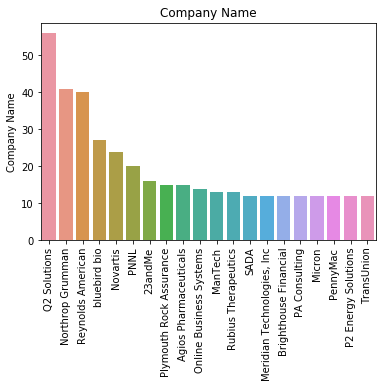

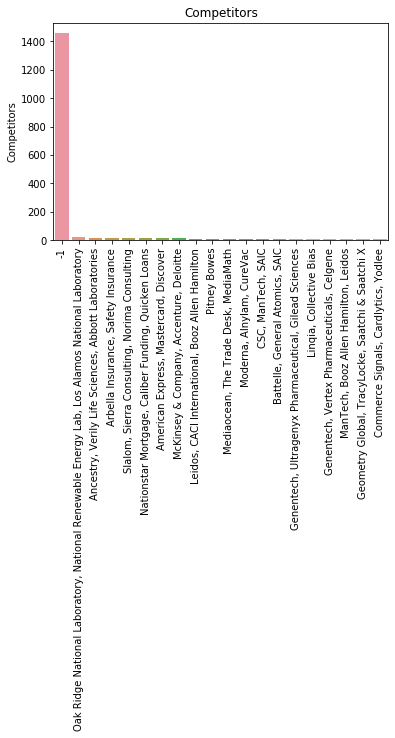

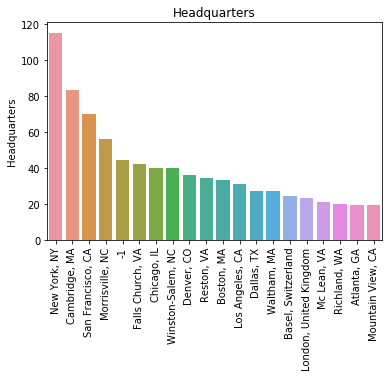

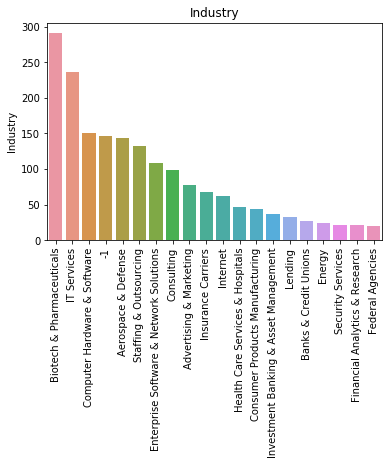

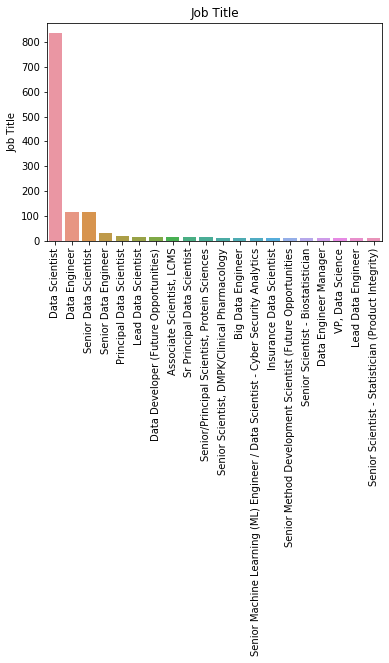

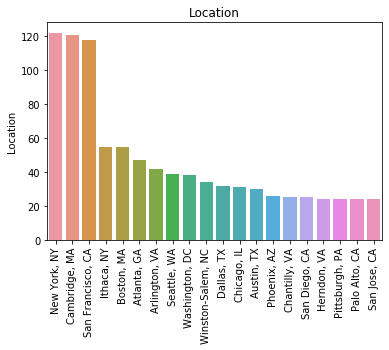

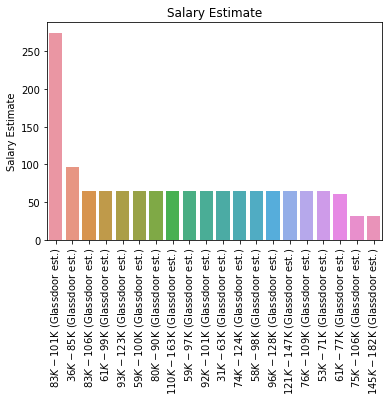

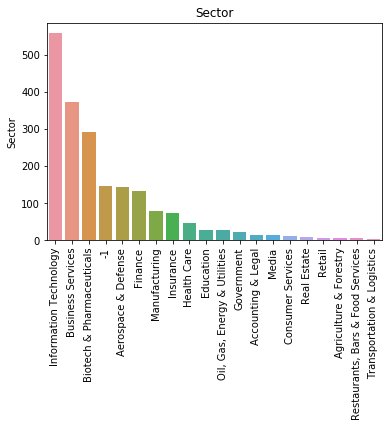

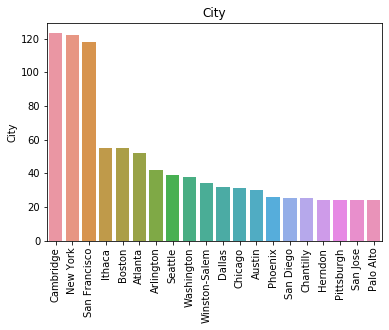

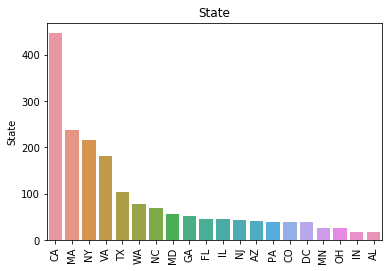

In [31]:
for i in H_cat:
    cat_num=hc[i].value_counts()[:20]
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_title(i)
    plt.show()

Looking at this boxplot we see that data engeer is the best paid job in the data science field and machine learning pays the least which doesn't really make sense(maybe we don't have many companies looking for people working in machine learning and those who are, are small companies that don't pay too much )

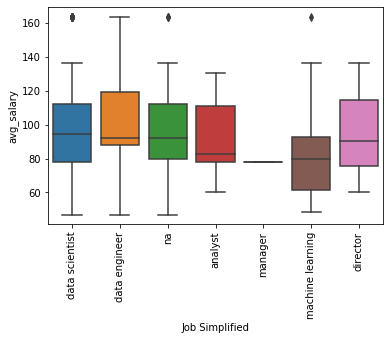

In [32]:
chart=sns.boxplot(df['Job Simplified'],df['avg_salary'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

plt.show()

Creating a pivot table to compare the average salary in defferent job positions

The most payed one as we saw in the boxplot is data engeneer and the least are machine learning and manager

In [33]:
pivot=pd.pivot_table(df,index='Job Simplified',values="avg_salary")
pivot.sort_values(by='avg_salary',ascending=False)

,avg_salary
Job Simplified,
data engineer,99.892857
na,96.476667
data scientist,96.190135
director,95.125000
analyst,92.833333
machine learning,85.657895
manager,78.000000


Adding the Seniority feature will help us understand more the salary destribution.
we see that junior data scientists are getting payed the most so we should check for outliers here.
As we saw in the boxplot there are some of them but rather than that we can see that senior data engeneers are the most payed.

In [34]:
pivot=pd.pivot_table(df,index=['Job Simplified','Job Senioriry'],values='avg_salary')
pivot.sort_values(by='avg_salary',ascending=False)

avg_salary
Job Simplified   Job Senioriry            
na               na             105.360465
data scientist   junior         101.173077
data engineer    na             100.553571
                 senior          99.562500
analyst          senior          97.562500
data scientist   na              97.308094
na               senior          95.874667
data scientist   senior          95.532429
director         senior          95.125000
na               junior          91.593750
machine learning senior          88.833333
analyst          na              83.375000
manager          senior          78.000000
machine learning na              73.750000

Create a pivot table with states and sort them.

In [35]:
pivot=pd.pivot_table(df,index=['State'],values='avg_salary')
pivot=pivot.sort_values(by='State',ascending=True)

Count the number of jobs in each state and concatinate the two dataframes.

In [36]:
count=df['State'].value_counts().sort_index()
pivot=pd.concat([pivot,count], axis=1)

Rename the columns.

In [37]:
pivot.columns=['avg_salary','n_jobs']

Show the 20 states with the most job offerings.

We see that the first State is California Followed by Ma and NY as we saw in the barchart.

In [38]:
pivot.sort_values(by='n_jobs',ascending=False)[:20]

,avg_salary,n_jobs
State,,
CA,98.321029,447
MA,95.235294,238
NY,101.182028,217
VA,95.016484,182
TX,98.326923,104
WA,90.756410,78
NC,91.702899,69
MD,95.754386,57
GA,97.615385,52


Displaying all the columns 

In [39]:
pd.set_option("display.max_rows",None)

Check the number of jobs with the job position specified in each state.

We can see that the most posted job position in almost all the states is data scientist.

In [40]:
pivot=pd.pivot_table(df,index=['State','Job Simplified'],values='avg_salary',aggfunc='count')
pivot.columns=['n_jobs']
pivot.sort_values(by='State',ascending=True)

n_jobs
State      Job Simplified          
AB         data scientist         2
AL         data engineer          4
           data scientist        11
           na                     2
AZ         data engineer         17
           data scientist        13
           na                    12
BC         data engineer          4
CA         data engineer         59
           data scientist       311
           director               2
           na                    75
CO         na                     6
           data engineer          2
           data scientist        31
CT         data engineer          2
           data scientist         9
DC         data engineer          1
           data scientist        37
DE         data scientist         7
           na                     5
FL         na                     6
           analyst                2
           data engineer          7
           data scientist        30
GA         na                     9
           data scientist        43
HI         data scientist         2
IA         data engineer          2
ID         analyst                2
           data scientist         2
IL         data engineer         10
           data scientist        20
           machine learning       5
           na                    10
IN         data engineer          3
           data scientist        13
           na                     2
KS         na                     2
           data scientist         4
KY         na                     6
LA         data engineer         12
MA         data engineer          9
           data scientist       122
           machine learning       4
           na                   103
MB         na                    14
MD         data scientist        43
           na                    14
MI         data scientist         3
MN         data scientist        13
           na                     5
           data engineer          7
MO         data scientist        12
           na                     5
NC         data engineer          2
           data scientist        22
           na                    45
NE         data scientist         6
NH         data scientist         5
NJ         analyst                2
           data engineer          4
           data scientist        30
           na                     7
NM         data scientist        10
NV         data scientist         2
NY         analyst                1
           data engineer         26
           data scientist       110
           director               6
           manager                2
           na                    72
NotDefined data engineer          2
           data scientist         7
OH         data engineer          7
           data scientist        18
OK         data engineer          4
           data scientist         2
ON         na                     4
           data scientist         6
OR         data scientist         2
           na                     2
PA         analyst                5
           data scientist        19
           machine learning       6
           na                     9
SC         data engineer          3
           data scientist         2
           na                     4
TN         data scientist         2
           na                     2
           data engineer          2
TX         data engineer         32
           data scientist        65
           na                     7
UT         data scientist         8
VA         data engineer         12
           data scientist       155
           na                    15
WA         machine learning       4
           data engineer         19
           data scientist        49
           na                     6
WI         na                     1
           data scientist         8
Warsaw     data scientist         1

Checking the average salary by state where the job position is data scientist
we can see that Warsaw Poland pays the more but we have only one job offering there so it's not that informative 
Connecticut and Utah maybe there are more senior data engeneer positions there.

In [41]:
pivot=pd.pivot_table(df[df['Job Simplified']=='data scientist'],index='State',values='avg_salary')
pivot.sort_values(by='avg_salary',ascending=False)

,avg_salary
State,
Warsaw,124.000000
CT,119.388889
UT,115.375000
KS,114.125000
AZ,104.461538
DC,103.810811
NY,102.790909
MO,101.750000
GA,101.395349


Checking the columns in our dataframe.

In [42]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'min_salary',
       'max_salary', 'avg_salary', 'City', 'State', 'Country', 'At_hq',
       'Company_age', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'Hadoop',
       'Tableau', 'Power_bi', 'BI', 'Min_revenue', 'Max_revenue',
       'Average_revenue', 'Job Simplified', 'Job Senioriry', 'Desc Length',
       'Competitors Length'],
      dtype='object')

Creating a data frame with the variables that we want to indlude in our pivot tables.

In [43]:
df_pivot=df[['Rating','Industry','Sector','Revenue','Python','R','Spark','AWS','Excel','Hadoop','Tableau','Power_bi','BI','Competitors Length','Type of ownership','avg_salary']]

Using a for loop to create pivot tables with average salary as value in them.

Although we are having an error at the end our pivot tables were created so we ignored it.

Most paying industry is Sporting Goods Stores and the least is Travel & Tourism.

Looking at type of ownership we see that College / University paye the most also Nonprofit Organization and Private Practice / Firm paye the least.

Companies with low rating less than the average surprisengly are paying more than companies with high ratings.

In [44]:
for i in df_pivot.columns:
    print(i,"\n")
    print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values(by='avg_salary',ascending=False),'\n')

Rating 

        avg_salary
Rating            
 2.5    127.000000
 2.7    107.062500
 2.4    105.264706
 2.6    104.958333
 4.4    103.147727
 2.3    101.166667
 4.3    100.941176
 1.0    100.250000
 4.1     99.896396
 3.1     99.395833
 5.0     99.174699
 4.6     99.133929
 4.5     98.990909
 4.2     98.218391
 2.9     98.175325
 4.9     97.684211
 3.5     97.481982
-1.0     97.282609
 3.8     96.831579
 4.8     96.166667
 3.7     96.009259
 3.2     95.425000
 3.6     95.092025
 3.9     93.959538
 4.0     93.216667
 4.7     92.607143
 3.3     91.562500
 3.4     91.512500
 2.8     90.700000
 3.0     89.863636
 2.2     78.000000 

Industry 

                                         avg_salary
Industry                                           
Sporting Goods Stores                    130.000000
Building & Personnel Services            127.000000
Transportation Management                124.000000
Colleges & Universities                  120.178571
Research & Development                 

ValueError: Grouper for 'avg_salary' not 1-dimensional

Over all we can see that companies with bigger Revenue are paying higher salaries.

Also both big and small companies are more interested in people with python skills.

In [45]:
pd.pivot_table(df_pivot,index='Revenue',columns='Python',values='avg_salary',aggfunc='count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),18,96
$1 to $5 million (USD),15,50
$10 to $25 million (USD),60,70
$10+ billion (USD),77,132
$100 to $500 million (USD),68,142
$2 to $5 billion (USD),36,30
$25 to $50 million (USD),31,83
$5 to $10 billion (USD),21,32
$5 to $10 million (USD),16,25


### Creating a Wordcloud

Impoting the libraries needed for the word cloud.

In [47]:
from wordcloud import WordCloud, STOPWORDS 

Creating the wordcloud with the most frequent words used in 'Job Description' field

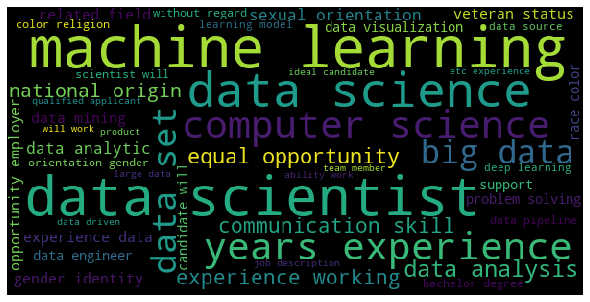

In [48]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df["Job Description"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 600, height = 300, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [49]:
df.to_csv('Cleaned_Data_EDA.csv',index=False)